<a href="https://colab.research.google.com/github/imamol555/Deep-Learning-Session/blob/main/FruitsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Get the Data**

In [1]:
!wget --no-check-certificate \
 https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip \
  -O /tmp/fruits_360.zip

--2021-03-17 09:50:43--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master [following]
--2021-03-17 09:50:43--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/fruits_360.zip’

/tmp/fruits_360.zip     [         <=>        ] 761.30M  30.2MB/s    in 31s     

2021-03-17 09:51:14 (24.9 MB/s) - ‘/tmp/fruits_360.zip’ saved [798281939]



In [2]:
import os
import zipfile

local_zip = '/tmp/fruits_360.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
print(len(os.listdir('/tmp/Fruit-Images-Dataset-master/Training/')))
print(len(os.listdir('/tmp/Fruit-Images-Dataset-master/Test/')))

131
131


In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

ValueError: ignored

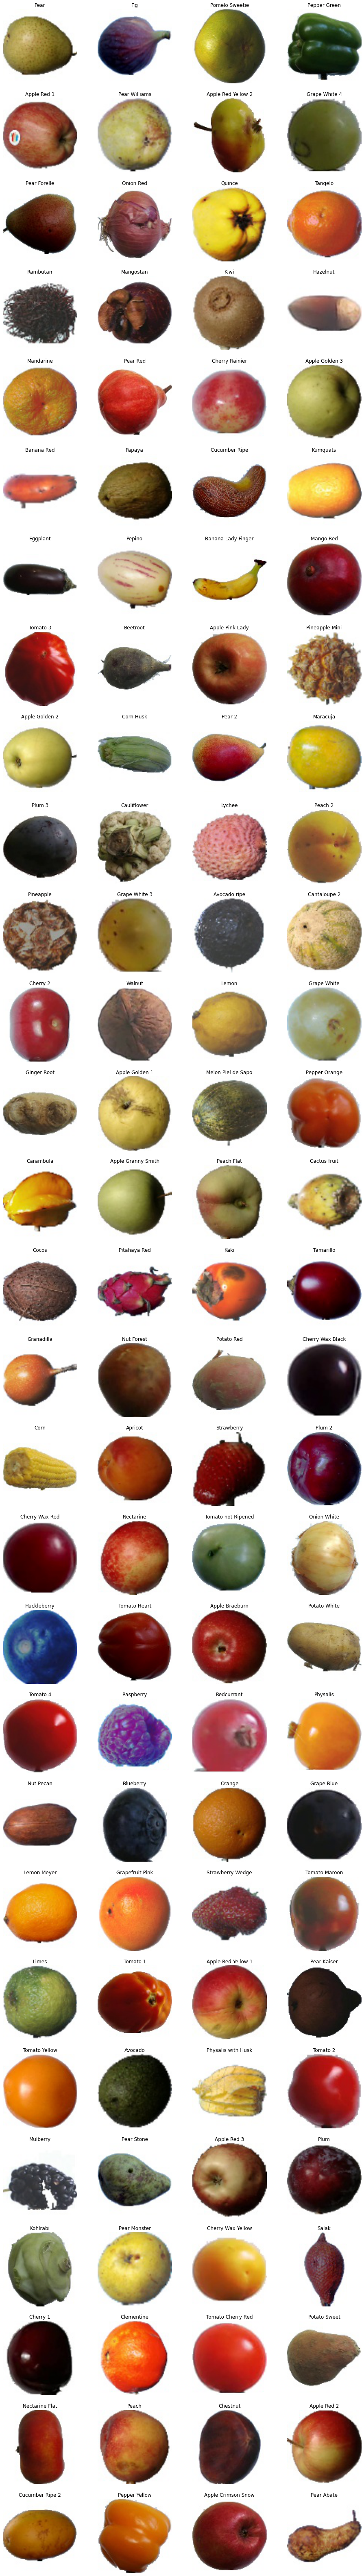

In [8]:
nrows = 29
ncols = 4
base_dir = '/tmp/Fruit-Images-Dataset-master/Training/'

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
class_names = []
for i, fruit_class in enumerate(os.listdir(base_dir)):
  #print(fruit_class_path)
  fruit_class_path = os.path.join(base_dir, fruit_class)
  img_abs = os.listdir(fruit_class_path)[0]
  img_path = os.path.join(fruit_class_path, img_abs)
  #print(img_path)
     
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  sp.set_title(fruit_class)
  class_names.append(fruit_class)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  
  

In [9]:
class_names

['Pear',
 'Fig',
 'Pomelo Sweetie',
 'Pepper Green',
 'Apple Red 1',
 'Pear Williams',
 'Apple Red Yellow 2',
 'Grape White 4',
 'Pear Forelle',
 'Onion Red',
 'Quince',
 'Tangelo',
 'Rambutan',
 'Mangostan',
 'Kiwi',
 'Hazelnut',
 'Mandarine',
 'Pear Red',
 'Cherry Rainier',
 'Apple Golden 3',
 'Banana Red',
 'Papaya',
 'Cucumber Ripe',
 'Kumquats',
 'Eggplant',
 'Pepino',
 'Banana Lady Finger',
 'Mango Red',
 'Tomato 3',
 'Beetroot',
 'Apple Pink Lady',
 'Pineapple Mini',
 'Apple Golden 2',
 'Corn Husk',
 'Pear 2',
 'Maracuja',
 'Plum 3',
 'Cauliflower',
 'Lychee',
 'Peach 2',
 'Pineapple',
 'Grape White 3',
 'Avocado ripe',
 'Cantaloupe 2',
 'Cherry 2',
 'Walnut',
 'Lemon',
 'Grape White',
 'Ginger Root',
 'Apple Golden 1',
 'Melon Piel de Sapo',
 'Pepper Orange',
 'Carambula',
 'Apple Granny Smith',
 'Peach Flat',
 'Cactus fruit',
 'Cocos',
 'Pitahaya Red',
 'Kaki',
 'Tamarillo',
 'Granadilla',
 'Nut Forest',
 'Potato Red',
 'Cherry Wax Black',
 'Corn',
 'Apricot',
 'Strawberry',
 

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Image Data Generator**

In [11]:
TRAINING_DIR = "/tmp/Fruit-Images-Dataset-master/Training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    target_size=(100, 100))

VALIDATION_DIR = "/tmp/Fruit-Images-Dataset-master/Test/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              target_size=(100, 100))

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


**Create Model**

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(131, activation=tf.nn.softmax)
])

model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

Compile Model

In [18]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


**Train** **Model**

In [19]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import time

LOG_DIR = f'fruits_classifier_{int(time.time())}'


tensorboard = TensorBoard(log_dir=f'logs/{LOG_DIR}')

In [20]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=583,
                              epochs=5,
                              validation_steps=196,
                              callbacks=[tensorboard],
                              verbose=2)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
583/583 - 43s - loss: 0.4613 - accuracy: 0.8865 - val_loss: 0.3833 - val_accuracy: 0.8962
Epoch 2/5
583/583 - 41s - loss: 0.0361 - accuracy: 0.9908 - val_loss: 0.3201 - val_accuracy: 0.9264
Epoch 3/5
583/583 - 40s - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.2020 - val_accuracy: 0.9632
Epoch 4/5
583/583 - 40s - loss: 0.0315 - accuracy: 0.9911 - val_loss: 0.3223 - val_accuracy: 0.9245
Epoch 5/5
583/583 - 40s - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.2340 - val_accuracy: 0.9540


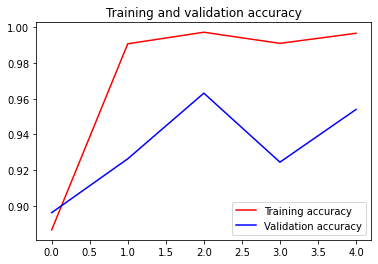

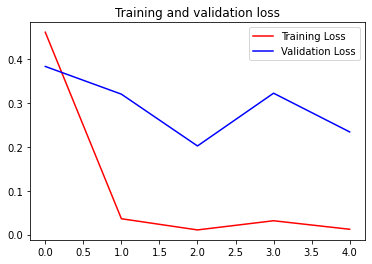

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
model.save('fruit_classifier_best.h5')

In [30]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(100, 100))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  pred = np.argmax(classes, 1)
  print(len(classes[0]))
  print(classes)
  print(np.argmax(classes,1))
  

Saving 106_100.jpg to 106_100.jpg
131
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[74]


In [31]:
classes = os.listdir(base_dir)
classes.sort()
classes[74]


'Onion Red'

In [ ]:
|